In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Manali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
from wordcloud import WordCloud

In [5]:
data = pd.read_csv('BBC News.csv')

In [6]:
data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


# understanding features and target variables

In [7]:
data['Category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [8]:
data.shape

(1490, 3)

In [9]:
data.columns

Index(['ArticleId', 'Text', 'Category'], dtype='object')

In [10]:
data.dtypes

ArticleId     int64
Text         object
Category     object
dtype: object

# countplot of target variable

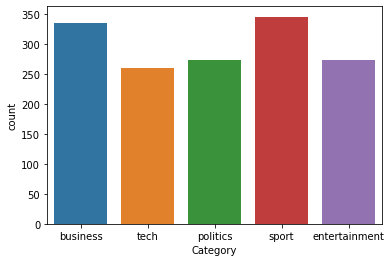

In [11]:
sns.countplot(data['Category'])

In [12]:
data['News_length']=data['Text'].str.len()

In [13]:
data['News_length']

0       1866
1       2016
2       3104
3       3618
4       2190
5       1588
6       1988
7       1342
8       2609
9       1368
10      3366
11      1177
12      1393
13      1815
14      2388
15      1656
16      4808
17      1600
18      1146
19      1532
20      1665
21      1874
22       921
23      1618
24      2025
25      2667
26      4950
27      5272
28      1653
29      2042
        ... 
1460    4494
1461    2980
1462    1970
1463    2112
1464    4791
1465    2657
1466    1985
1467    1239
1468    3009
1469    2382
1470    2086
1471    2309
1472    3171
1473    1217
1474    1655
1475    3121
1476    2996
1477    3952
1478    2550
1479    1835
1480    1821
1481    2346
1482    4122
1483    1455
1484    1436
1485    1266
1486    3111
1487    1370
1488    3242
1489    1723
Name: News_length, Length: 1490, dtype: int64

# distribution plot

Text(0.5, 1.0, 'News Length Distribution')

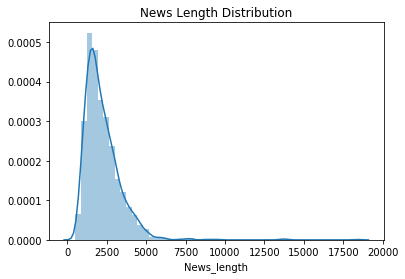

In [14]:
sns.distplot(data['News_length']).set_title('News Length Distribution')

# wordCloud

In [15]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

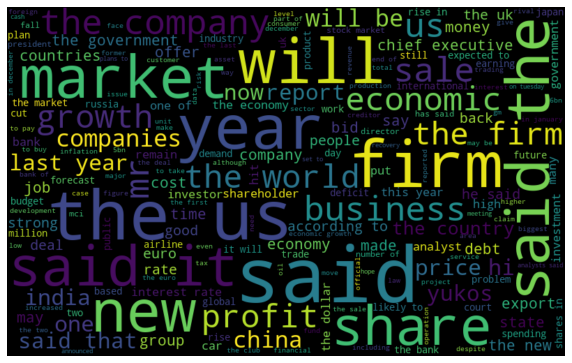

In [16]:
subset = data[data.Category=='business']
text =subset.Text.values
words = ''.join(text)
create_wordcloud(words)

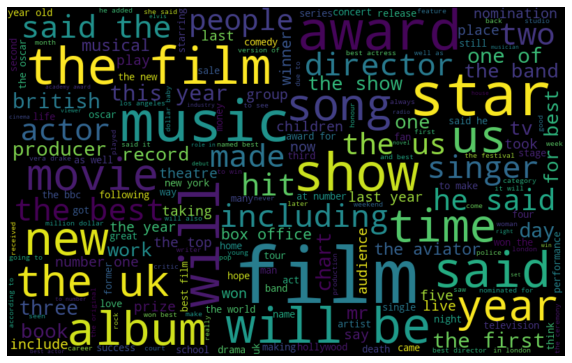

In [17]:
subset = data[data.Category=='entertainment']
text =subset.Text.values
words = ''.join(text)
create_wordcloud(words)

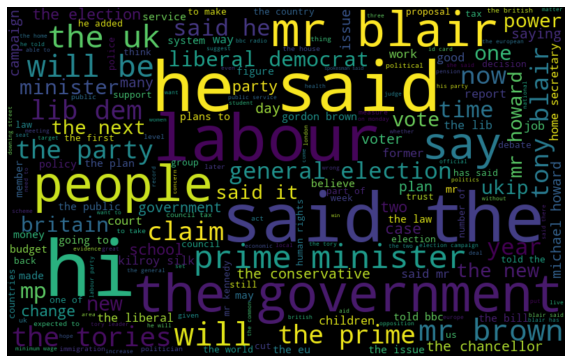

In [18]:
subset = data[data.Category=='politics']
text =subset.Text.values
words = ''.join(text)
create_wordcloud(words)

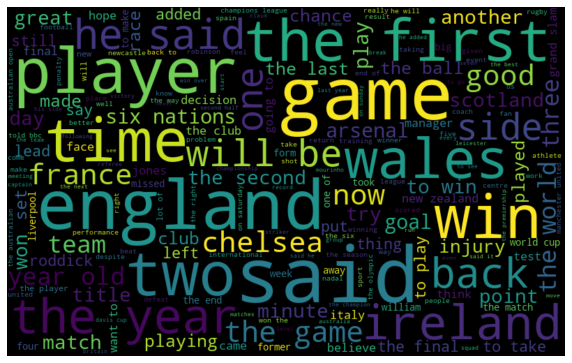

In [19]:
subset = data[data.Category=='sport']
text =subset.Text.values
words = ''.join(text)
create_wordcloud(words)

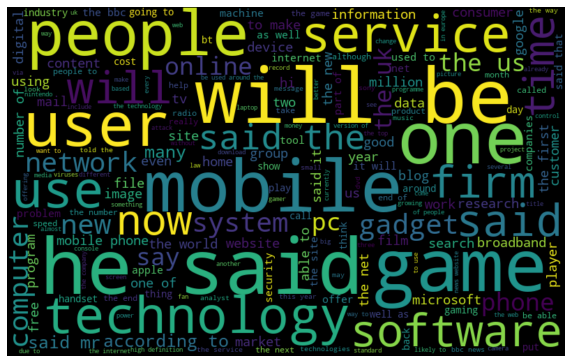

In [20]:
subset = data[data.Category=='tech']
text =subset.Text.values
words = ''.join(text)
create_wordcloud(words)

# preprocessing 

In [21]:
def process_text(text):
    text = text.lower().replace('\n', ' ').replace('\r','').strip()
    text = re.sub(' +', ' ',text)
    text = re.sub(r'[^\w\s]', '', text)
    
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    
    
    #filtered_sentence = []
    #for w in word_tokens:
        #if w not in stop_words:
            #filtered_sentence.append(w)
    
    text = ' '.join(filtered_sentence)
    return text

In [22]:
data['Text_parsed']= data['Text'].apply(process_text)

In [23]:
data.head()

,ArticleId,Text,Category,News_length,Text_parsed
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...


# Label Encoding

In [24]:
le = preprocessing.LabelEncoder()
data['Category_target']=le.fit_transform(data['Category'])

In [25]:
data.head()

,ArticleId,Text,Category,News_length,Text_parsed,Category_target
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...,0
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...,0
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...,4
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...,0


In [26]:
data.to_csv('BBC_News_Preprocessed.csv')

# split data in training and testing

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data['Text_parsed'],data['Category_target'],test_size=0.2,random_state=8)

In [28]:
X_train.shape

(1192,)

In [29]:
X_test.shape

(298,)

In [30]:
ngram_range = (1,2)
min_df =10
max_df=1.
max_features =300

In [31]:
tfidf = TfidfVectorizer(encoding = 'utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                       min_df=min_df,
                       max_features=max_features,
                       norm = 'l2',
                       sublinear_tf = True)

features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train 

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test 

In [32]:
labels_train.shape

(1192,)

In [33]:
labels_test.shape

(298,)

In [34]:
features_train.shape

(1192, 300)

In [35]:
features_test.shape

(298, 300)

# Model Building

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
model = RandomForestClassifier(random_state = 1)
model.fit(features_train,labels_train)
model_predictions = model.predict(features_test)
print('Accuracy:',accuracy_score(labels_test,model_predictions))

print("\n\n-----------------------------------------\n\n")


print('classification report:\n\n',classification_report(labels_test,model_predictions))

Accuracy: 0.9194630872483222


-----------------------------------------


classification report:

               precision    recall  f1-score   support

           0       0.93      0.87      0.90        76
           1       0.94      0.94      0.94        47
           2       0.89      0.85      0.87        55
           3       0.96      0.98      0.97        65
           4       0.88      0.96      0.92        55

    accuracy                           0.92       298
   macro avg       0.92      0.92      0.92       298
weighted avg       0.92      0.92      0.92       298



In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
model = LogisticRegression()
model.fit(features_train,labels_train)
model_predictions = model.predict(features_test)
print('Accuracy:',accuracy_score(labels_test,model_predictions))

print("\n\n-----------------------------------------\n\n")


print('classification report:\n\n',classification_report(labels_test,model_predictions))

Accuracy: 0.9429530201342282


-----------------------------------------


classification report:

               precision    recall  f1-score   support

           0       0.92      0.92      0.92        76
           1       0.98      0.98      0.98        47
           2       0.96      0.87      0.91        55
           3       0.96      0.98      0.97        65
           4       0.91      0.96      0.94        55

    accuracy                           0.94       298
   macro avg       0.95      0.94      0.94       298
weighted avg       0.94      0.94      0.94       298



In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
model = KNeighborsClassifier()
model.fit(features_train,labels_train)
model_predictions = model.predict(features_test)
print('Accuracy:',accuracy_score(labels_test,model_predictions))

print("\n\n-----------------------------------------\n\n")


print('classification report:\n\n',classification_report(labels_test,model_predictions))

Accuracy: 0.912751677852349


-----------------------------------------


classification report:

               precision    recall  f1-score   support

           0       0.92      0.87      0.89        76
           1       1.00      0.89      0.94        47
           2       0.84      0.89      0.87        55
           3       0.98      0.95      0.97        65
           4       0.84      0.96      0.90        55

    accuracy                           0.91       298
   macro avg       0.92      0.91      0.91       298
weighted avg       0.92      0.91      0.91       298



In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
model = DecisionTreeClassifier()
model.fit(features_train,labels_train)
model_predictions = model.predict(features_test)
print('Accuracy:',accuracy_score(labels_test,model_predictions))

print("\n\n-----------------------------------------\n\n")


print('classification report:\n\n',classification_report(labels_test,model_predictions))

Accuracy: 0.7885906040268457


-----------------------------------------


classification report:

               precision    recall  f1-score   support

           0       0.72      0.76      0.74        76
           1       0.85      0.85      0.85        47
           2       0.73      0.60      0.66        55
           3       0.82      0.92      0.87        65
           4       0.83      0.80      0.81        55

    accuracy                           0.79       298
   macro avg       0.79      0.79      0.79       298
weighted avg       0.79      0.79      0.79       298



In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report
model =  GaussianNB()
model.fit(features_train,labels_train)
model_predictions = model.predict(features_test)
print('Accuracy:',accuracy_score(labels_test,model_predictions))

print("\n\n-----------------------------------------\n\n")


print('classification report:\n\n',classification_report(labels_test,model_predictions))

Accuracy: 0.8825503355704698


-----------------------------------------


classification report:

               precision    recall  f1-score   support

           0       0.86      0.83      0.85        76
           1       0.89      0.89      0.89        47
           2       0.90      0.84      0.87        55
           3       0.95      0.95      0.95        65
           4       0.81      0.91      0.85        55

    accuracy                           0.88       298
   macro avg       0.88      0.88      0.88       298
weighted avg       0.88      0.88      0.88       298



# Hyperparameter Tunning (Random Forest)

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
n_estimators =[100,300,500,800,1200]
max_depth = [5,8,15,25,30]
min_samples_split=[2,5,10,15,100]
min_samples_leaf = [1,2,5,10]


hyperF = dict(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)

hyperF

{'n_estimators': [100, 300, 500, 800, 1200],
 'max_depth': [5, 8, 15, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [43]:
model = RandomForestClassifier()
gridF = GridSearchCV(model,hyperF,cv=3,verbose=1,n_jobs =-1)
bestF = gridF.fit(features_train,labels_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  9.8min finished


In [44]:
bestF.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 300}

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
model = RandomForestClassifier(random_state = 1,max_depth=30,min_samples_leaf=1,min_samples_split=5,n_estimators=300)
model.fit(features_train,labels_train)
model_predictions = model.predict(features_test)
print('Accuracy:',accuracy_score(labels_test,model_predictions))

print("\n\n-----------------------------------------\n\n")


print('classification report:\n\n',classification_report(labels_test,model_predictions))

Accuracy: 0.9261744966442953


-----------------------------------------


classification report:

               precision    recall  f1-score   support

           0       0.94      0.89      0.92        76
           1       0.96      0.91      0.93        47
           2       0.91      0.87      0.89        55
           3       0.93      0.97      0.95        65
           4       0.90      0.98      0.94        55

    accuracy                           0.93       298
   macro avg       0.93      0.93      0.93       298
weighted avg       0.93      0.93      0.93       298



# hyperparameter tunning (log reg)

In [46]:
param_grid = {'C': [0.1,0.001, 1],'penalty' :['l1','l2']}
model =LogisticRegression()
clf = GridSearchCV(model,param_grid,cv=3,verbose=1)
bestF = clf.fit(features_train,labels_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Manali\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Manali\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Manali\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalti

In [47]:
bestF.best_params_

{'C': 1, 'penalty': 'l2'}

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
model = LogisticRegression(C=1, penalty='l2')
model.fit(features_train,labels_train)
model_predictions = model.predict(features_test)
print('Accuracy:',accuracy_score(labels_test,model_predictions))

print("\n\n-----------------------------------------\n\n")


print('classification report:\n\n',classification_report(labels_test,model_predictions))

Accuracy: 0.9429530201342282


-----------------------------------------


classification report:

               precision    recall  f1-score   support

           0       0.92      0.92      0.92        76
           1       0.98      0.98      0.98        47
           2       0.96      0.87      0.91        55
           3       0.96      0.98      0.97        65
           4       0.91      0.96      0.94        55

    accuracy                           0.94       298
   macro avg       0.95      0.94      0.94       298
weighted avg       0.94      0.94      0.94       298



# Hyper parameter for knn

In [49]:
params_KNN = {'n_neighbors':[1,2,3,4,5,6,7], 'p':[1,2,5]}
model = KNeighborsClassifier()
gridF = GridSearchCV(model,params_KNN,cv=3, verbose=1,n_jobs= -1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:   11.0s finished


In [50]:
bestF.best_params_

{'n_neighbors': 7, 'p': 2}

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
model = KNeighborsClassifier(n_neighbors = 7, p = 2)
model.fit(features_train,labels_train)
model_predictions = model.predict(features_test)
print('Accuracy:',accuracy_score(labels_test,model_predictions))

print("\n\n-----------------------------------------\n\n")


print('classification report:\n\n',classification_report(labels_test,model_predictions))

Accuracy: 0.9161073825503355


-----------------------------------------


classification report:

               precision    recall  f1-score   support

           0       0.93      0.87      0.90        76
           1       1.00      0.89      0.94        47
           2       0.88      0.91      0.89        55
           3       0.97      0.95      0.96        65
           4       0.83      0.96      0.89        55

    accuracy                           0.92       298
   macro avg       0.92      0.92      0.92       298
weighted avg       0.92      0.92      0.92       298



# Doc2Vec

In [52]:
data_processed = pd.read_csv('BBC_News_Preprocessed.csv')

In [53]:
data_processed .columns

Index(['Unnamed: 0', 'ArticleId', 'Text', 'Category', 'News_length',
       'Text_parsed', 'Category_target'],
      dtype='object')

In [54]:
data = pd.DataFrame()

In [55]:
data['Text'] = data_processed['Text_parsed']

In [56]:
data['Category'] =data_processed['Category_target']

In [57]:
data.head()

,Text,Category
0,worldcom exboss launches defence lawyers defen...,0
1,german business confidence slides german busin...,0
2,bbc poll indicates economic gloom citizens maj...,0
3,lifestyle governs mobile choice faster better ...,4
4,enron bosses 168m payout eighteen former enron...,0


In [58]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [83]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []

    
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    
    return labeled


X_train, X_test, y_train, y_test = train_test_split(data.Text, data.Category, random_state=0, test_size=0.3)

X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [84]:
all_data[0:2]

[TaggedDocument(words=['solskjaer', 'raises', 'hopes', 'return', 'manchester', 'united', 'striker', 'ole', 'gunnar', 'solskjaer', 'said', 'hoped', 'return', 'next', 'season', 'following', 'careerthreatening', 'injury', 'right', 'knee', '31yearold', 'norway', 'international', 'surgery', 'sweden', 'august', 'transplant', 'cartilage', 'joint', 'doubt', 'play', 'solskjaer', 'told', 'aftenposten', 'daily', 'problem', 'speed', 'talking', 'eight', 'months', 'time', 'going', 'knee', 'slavishly', 'following', 'programme', 'solskjaer', 'last', 'played', 'united', 'late', 'substitute', 'may', 'fa', 'cup', 'final', 'win', 'millwall', 'contract', 'united', 'runs', '2006', 'time', 'premier', 'league', 'club', '10', 'years'], tags=['Train_0']),
 TaggedDocument(words=['microsoft', 'releases', 'bumper', 'patches', 'microsoft', 'warned', 'pc', 'users', 'update', 'systems', 'latest', 'security', 'fixes', 'flaws', 'windows', 'programs', 'monthly', 'security', 'bulletin', 'flagged', 'eight', 'critical', 's

In [85]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 1490/1490 [00:00<?, ?it/s]


In [92]:

import numpy as np
def get_vectors(model, corpus_size, vectors_size, vectors_type):
   
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [94]:
train_vectors_dbow.shape

(1043, 300)

In [95]:
train_vectors_dbow[:5]

array([[-0.19653165, -0.40887865, -0.37020427, ..., -0.80012327,
         0.41509077,  0.33906287],
       [ 0.12777582, -0.4855243 ,  0.01281785, ..., -0.17512119,
        -0.14897043,  0.5477823 ],
       [-0.50299275,  0.69178689, -0.29273674, ...,  0.26904866,
         0.96364832,  0.46253708],
       [-0.28537166,  0.51875824, -0.84726238, ...,  1.00399542,
         0.41163981,  0.0076989 ],
       [-0.15649328, -0.2807309 , -0.3861872 , ..., -0.35373423,
         0.31691161,  0.02683744]])

# Logistic Regression

In [101]:
model= LogisticRegression(C=1e5)
model = model.fit(train_vectors_dbow,y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction,y_test))
print(classification_report(model_prediction,y_test))

accuracy 0.9642058165548099
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       103
           1       0.98      0.94      0.96        93
           2       0.93      0.97      0.95        77
           3       0.97      0.99      0.98        95
           4       0.99      0.96      0.97        79

    accuracy                           0.96       447
   macro avg       0.96      0.96      0.96       447
weighted avg       0.96      0.96      0.96       447

